We will:

Train the same simple linear model using different optimizers.

Compare loss reduction speed for each optimizer.

Analyze the effect of different learning rates.

🔥 Popular Optimizers

1️⃣ Stochastic Gradient Descent (SGD)

Basic gradient descent algorithm
Updates weights in the same way as we did earlier.
Works well, but slow convergence in complex models.

2️⃣ Momentum-based SGD

Adds a momentum term to smooth updates.
Faster convergence by reducing oscillations.

3️⃣ Adam (Adaptive Moment Estimation)

Most widely used optimizer in Deep Learning.
Combines SGD + Momentum + Adaptive Learning Rate.
Fastest & most stable.

4️⃣ RMSprop (Root Mean Square Propagation)

Adjusts learning rates individually per parameter.
Used in recurrent networks (RNNs).

We will compare SGD, SGD + Momentum, RMSprop, and Adam.

In [18]:
import torch

import matplotlib.pyplot as plt

In [19]:
# Sample dataset

x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[5.0], [7.0], [9.0], [11.0]])

In [20]:
optimizers = {

    "SGD" : torch.optim.SGD,
    "SGD + Momentum": lambda params, lr : torch.optim.SGD(params, lr=lr, momentum=0.9),
    "RMSprop": torch.optim.RMSprop,
    "Adam": torch.optim.Adam
}

In [21]:
epochs = 100

learning_rate =0.1

loss_histories = {}

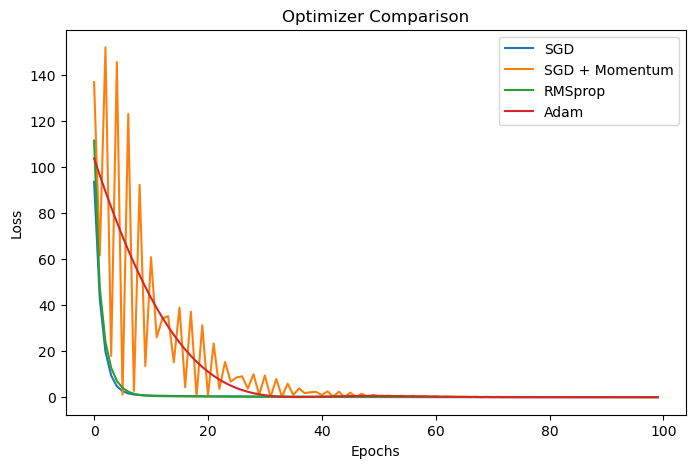

In [22]:
for opt_name, opt_func in optimizers.items():

    # Initialize model parameters

    w = torch.randn(1, requires_grad=True)

    b = torch.randn(1, requires_grad=True)


    optimizer = opt_func([w,b], lr = learning_rate)



    loss_history = []

    for epoch in range(epochs):

        y_pred = w * x + b  # Forward Pass

        loss = ((y_pred-y) **2).mean() # Compute Loss

        
        optimizer.zero_grad()  # Reset gradients

        loss.backward()  # Compute Gradients

        optimizer.step()  # Update parameters


        loss_history.append(loss.item()) # Store loss values


    loss_histories[opt_name] = loss_history  # Store loss for each optimizer

    
# 📊 Plot Loss Curves

plt.figure(figsize=(8,5))

for opt_name, loss_history in loss_histories.items():

    plt.plot(loss_history, label=opt_name)

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title("Optimizer Comparison")

plt.legend()

plt.show()


✅ Observations

SGD may be slow in convergence.

SGD + Momentum reduces oscillations and speeds up training.

RMSprop adapts the learning rate, making convergence smoother.

Adam is usually the fastest and most stable.